# **Case Study 2 - Clustering Analysis - Group I**

| NIM | Nama |
| -------- | -------- |
|11220940000018   |Shafira Al Zuhra     |
|11220940000030   |      Adinda Nabila   |
|11220940000041  | Muhammad Akhdan |
|11220940000052   | Tsabita Salma      |

#Import Packages

In [ ]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.spatial.distance
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import Data

In [ ]:
url='https://github.com/tsabitasa/CaseStudy02-DataMining-Group-I/raw/24d49879c158cb3a3f453aa55ac514830fd50a46/Case-Study-02-MixITup.xlsx'

In [ ]:
df = pd.read_excel(url)
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


#Preprocessing

In [ ]:
#Menampilkan informasi ringkas dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


Dataset ini memiliki 200 baris dan 10 kolom, dengan beberapa kolom berisi nilai kosong pada kolom "Jenis Kelamin", "Menikah" dan, "Promo". Selain itu, beberapa kolom disimpan sebagai tipe data yang tidak sesuai.

In [ ]:
#Mengubah tipe data yang kategorik
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

In [ ]:
#Mengubah tipe data kolom numerik
df['Umur'] = df['Umur'].astype(str).str.replace("'", '', regex=False)
df['Umur'] = df['Umur'].astype(int)

In [ ]:
#Mengecek missing values
df.isnull().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


Dataset ini memiliki nilai null pada kolom-kolom berikut:
1. "Jenis Kelamin" yang memiliki 4 nilai null
2. "Menikah" dengan 12 nilai null
3. "Promo" dengan 6 nilai null.

Solusi:
Menghapus baris pada kolom "Jenis Kelamin" dan "Menikah", serta melakukan imputasi kolom "Promo" dengan 0 karena diasumsikan pelanggan tidak pernah menggunakan promo.

In [ ]:
df.iloc[119]

,119
ID,220
Jenis Kelamin,Pria
Umur,2
Pendapatan-per-bulan,18032786
skor-pengeluaran,41
Menikah,0
Kota,Jakarta
Promo,2.0
HariFav,Senin
FavFlavor,0


In [ ]:
#Menghapus noise
df = df.drop(index=119)

In [ ]:
#Imputasi kolom "Promo" dengan 0
df["Promo"].fillna(0, inplace = True)

In [ ]:
#Menghapus baris pada kolom yang memiliki missing values
df.dropna(inplace=True)

In [ ]:
#Menghapus kolom yang tidak diperlukan
df.drop(columns=['ID'], inplace=True)

In [ ]:
#Membuat variabel untuk kolom kategorik dan numerik
categorical_columns = df.select_dtypes(include=['category']).columns
numerical_columns = df.select_dtypes(include=np.number).columns

In [ ]:
#Mengecek noise pada kolom kategorik
for col in categorical_columns:
    print(df[col].unique())
    print("\n")

['Wanita', 'Pria', '-']
Categories (3, object): ['-', 'Pria', 'Wanita']


[1, 0, ' ', '-']
Categories (4, object): [0, 1, ' ', '-']


['Jakarta', 'Depok', 'Tangerang', 'JJakarta']
Categories (4, object): ['Depok', 'JJakarta', 'Jakarta', 'Tangerang']


[1.0, 2.0, 0.0, 3.0, 5.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 5.0]


['Sabtu', 'Minggu', 'Rabu', 'Senin', 'Selasa', 'Jumat', 'Kamis']
Categories (7, object): ['Jumat', 'Kamis', 'Minggu', 'Rabu', 'Sabtu', 'Selasa', 'Senin']


[2, 6, 3, 7, 8, 0, 5, 4, 1, 9]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]




In [ ]:
#Menangani noise
df.drop(df[df['Jenis Kelamin'] == '-'].index, inplace=True)
df.drop(df[df['Menikah'].isin([' ', '-'])].index, inplace=True)
df.drop(df[df['FavFlavor'] == 9].index, inplace=True)
df.drop(df[df['Promo'] == 5.0].index, inplace=True)
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')

In [ ]:
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


In [ ]:
# Mengecek noise dan menghapus kategori yang tidak digunakan pada kolom kategorikal
for col in categorical_columns:
    if df[col].dtype.name == 'category':  # Pastikan kolom bertipe category
        # Menghapus kategori yang tidak digunakan
        df[col] = df[col].cat.remove_unused_categories()

    print(f"Nilai unik pada kolom {col}:")
    print(df[col].unique())
    print("\n")

Nilai unik pada kolom Jenis Kelamin:
['Wanita', 'Pria']
Categories (2, object): ['Pria', 'Wanita']


Nilai unik pada kolom Menikah:
[1, 0]
Categories (2, object): [0, 1]


Nilai unik pada kolom Kota:
['Jakarta', 'Depok', 'Tangerang']
Categories (3, object): ['Depok', 'Jakarta', 'Tangerang']


Nilai unik pada kolom Promo:
[1.0, 2.0, 0.0, 3.0]
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]


Nilai unik pada kolom HariFav:
['Sabtu', 'Minggu', 'Rabu', 'Senin', 'Selasa', 'Jumat', 'Kamis']
Categories (7, object): ['Jumat', 'Kamis', 'Minggu', 'Rabu', 'Sabtu', 'Selasa', 'Senin']


Nilai unik pada kolom FavFlavor:
[2, 6, 3, 7, 8, 0, 5, 4, 1]
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]




In [ ]:
# Melihat ringkasan statistik dari kolom numerik
df.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,178.000000,1.780000e+02,178.000000
mean,37.000000,1.847255e+07,51.044944
std,11.899295,1.060906e+07,25.769693
min,18.000000,0.000000e+00,1.000000
25%,28.000000,1.045082e+07,35.250000
50%,35.000000,1.864754e+07,51.500000
75%,47.000000,2.540984e+07,73.000000
max,60.000000,5.000000e+07,99.000000


In [ ]:
#Mengecek duplikasi data
df.duplicated().sum()

0

In [ ]:
#Mengecek duplikasi data
df.transpose().duplicated().sum()

0

In [ ]:
#Membuat variabel baru yang berisi interval skor pengeluaran
bins = [0,33,66,100]
labels = ['bronze','silver','gold']
df['skor_interval'] = pd.cut(df['skor-pengeluaran'] , bins=bins, labels=labels, right=False)

In [ ]:
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,skor_interval
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2,silver
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6,gold
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3,silver
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7,silver
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8,silver
...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0,gold
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5,silver
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7,gold
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0,gold


#Visualisasi

Index(['Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
       'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor', 'skor_interval'],
      dtype='object')


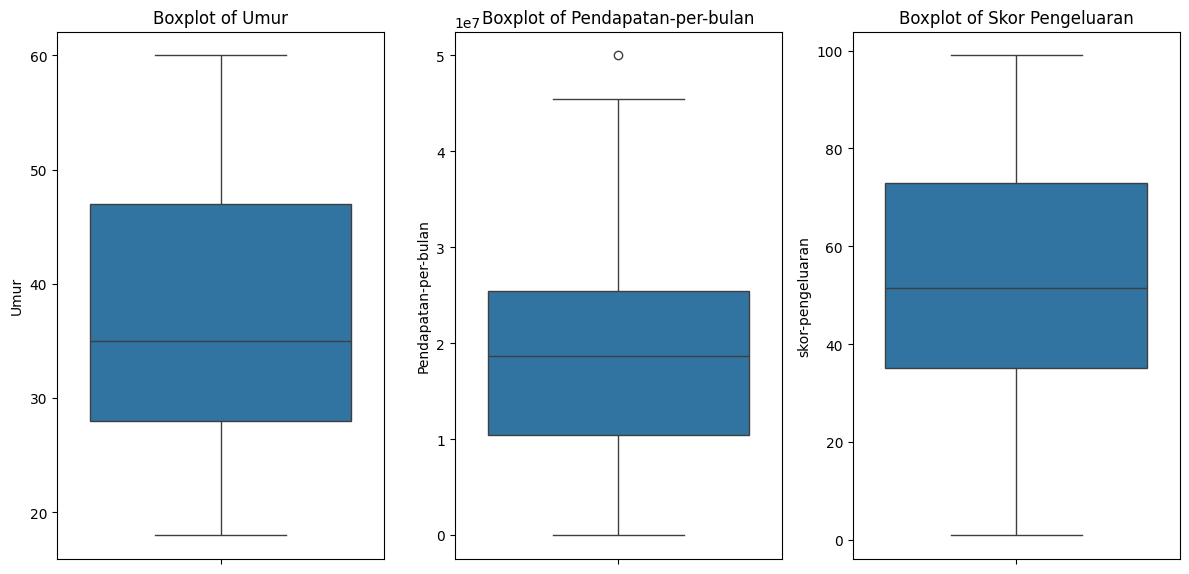

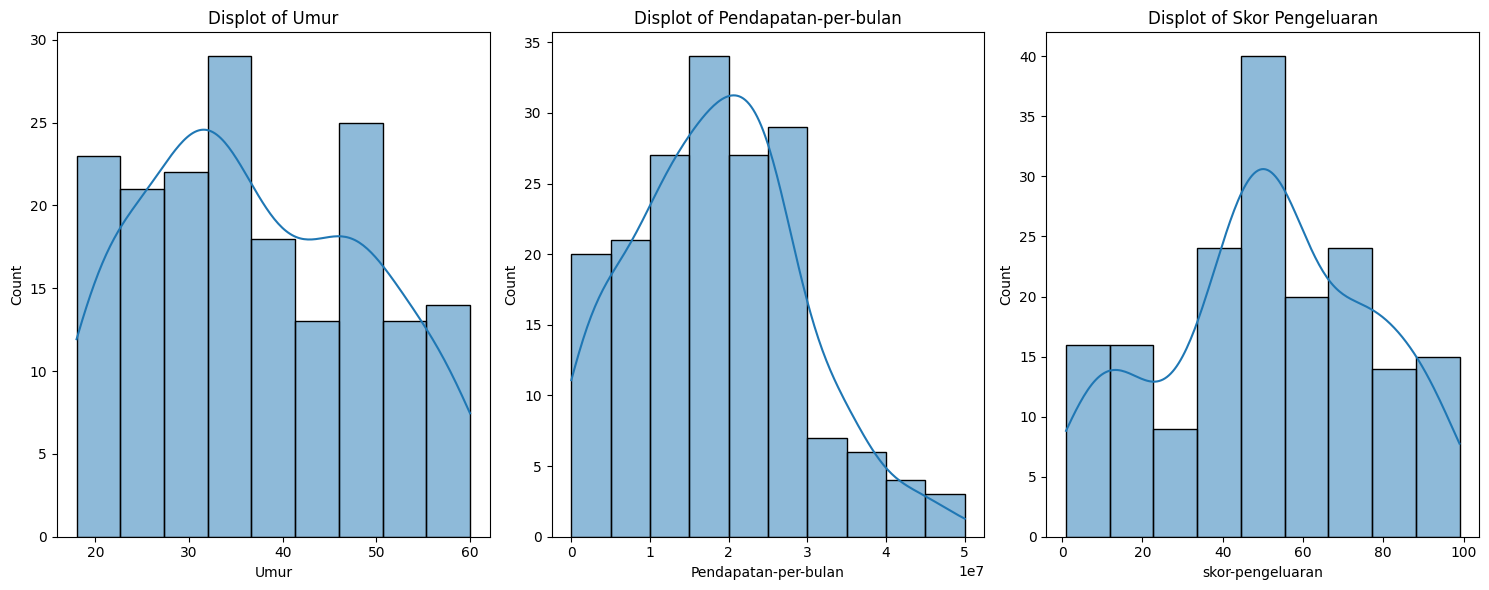

In [ ]:
# Cek nama kolom terlebih dahulu
print(df.columns)

# Memilih kolom yang benar sesuai DataFrame
selected_columns = df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']]

# Boxplot for each variable
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='Umur', data=df)
plt.title('Boxplot of Umur')

plt.subplot(1, 3, 2)
sns.boxplot(y='Pendapatan-per-bulan', data=df)
plt.title('Boxplot of Pendapatan-per-bulan')

plt.subplot(1, 3, 3)
sns.boxplot(y='skor-pengeluaran', data=df)
plt.title('Boxplot of Skor Pengeluaran')

plt.tight_layout()
plt.show()

# Displot for each variable
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Umur'], kde=True)
plt.title('Displot of Umur')

plt.subplot(1, 3, 2)
sns.histplot(df['Pendapatan-per-bulan'], kde=True)
plt.title('Displot of Pendapatan-per-bulan')

plt.subplot(1, 3, 3)
sns.histplot(df['skor-pengeluaran'], kde=True)
plt.title('Displot of Skor Pengeluaran')

plt.tight_layout()
plt.show()

    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0          Wanita    49              13114754                52       1   
1          Wanita    32              33606557                86       1   
2            Pria    51              15983606                41       1   
3            Pria    19              12704918                55       0   
4          Wanita    38              20081967                42       1   
..            ...   ...                   ...               ...     ...   
195          Pria    31               4098360                73       1   
196          Pria    57              15983606                51       1   
197        Wanita    35              43032786                79       1   
198        Wanita    23               1229508                94       1   
199          Pria    50               1639344                14       1   

          Kota Promo HariFav FavFlavor skor_interval  
0      Jakarta   1.0   Sabtu         2      

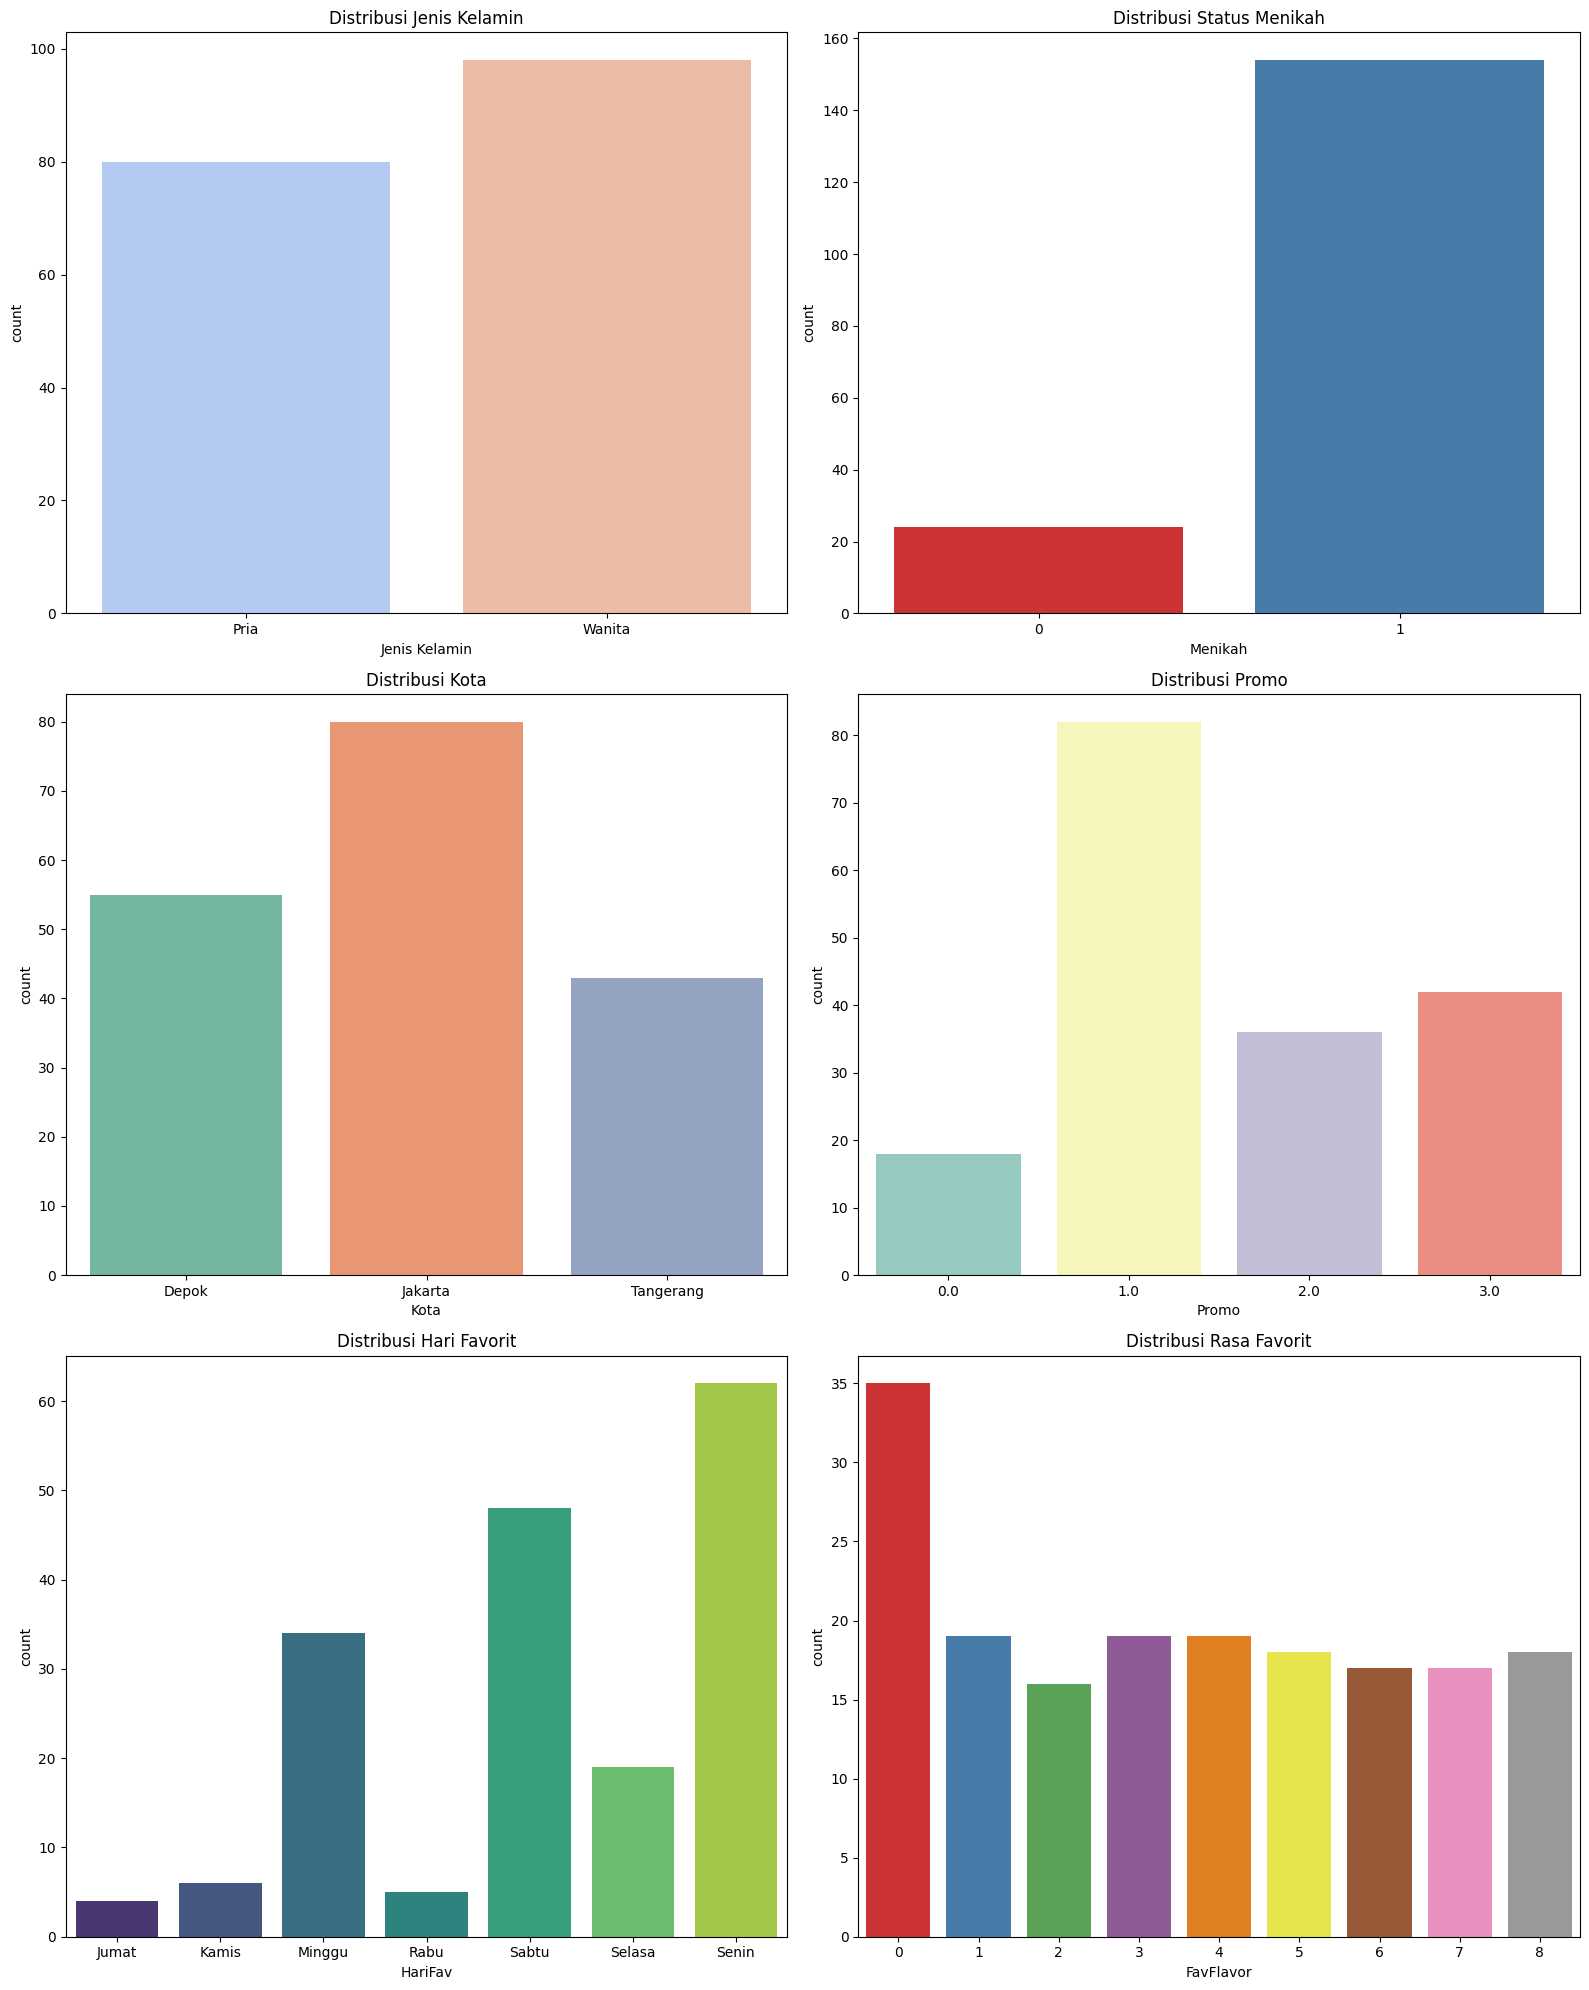

In [ ]:
df = pd.DataFrame(df)
print(df)

# Membuat plot dengan ukuran besar
plt.figure(figsize=(16, 20))

# Membuat countplot untuk 'Jenis Kelamin'
plt.subplot(3, 2, 1)
sns.countplot(x='Jenis Kelamin', data=df, palette='coolwarm')
plt.title('Distribusi Jenis Kelamin')

# Membuat countplot untuk 'Menikah'
plt.subplot(3, 2, 2)
sns.countplot(x='Menikah', data=df, palette='Set1')
plt.title('Distribusi Status Menikah')

# Membuat countplot untuk 'Kota'
plt.subplot(3, 2, 3)
sns.countplot(x='Kota', data=df, palette='Set2')
plt.title('Distribusi Kota')

# Membuat countplot untuk 'Promo'
plt.subplot(3, 2, 4)
sns.countplot(x='Promo', data=df, palette='Set3')
plt.title('Distribusi Promo')

# Membuat countplot untuk 'HariFav'
plt.subplot(3, 2, 5)
sns.countplot(x='HariFav', data=df, palette='viridis')
plt.title('Distribusi Hari Favorit')

# Membuat countplot untuk 'FavFlavor'
plt.subplot(3, 2, 6)
sns.countplot(x='FavFlavor', data=df, palette='Set1')
plt.title('Distribusi Rasa Favorit')

# Mengatur layout agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


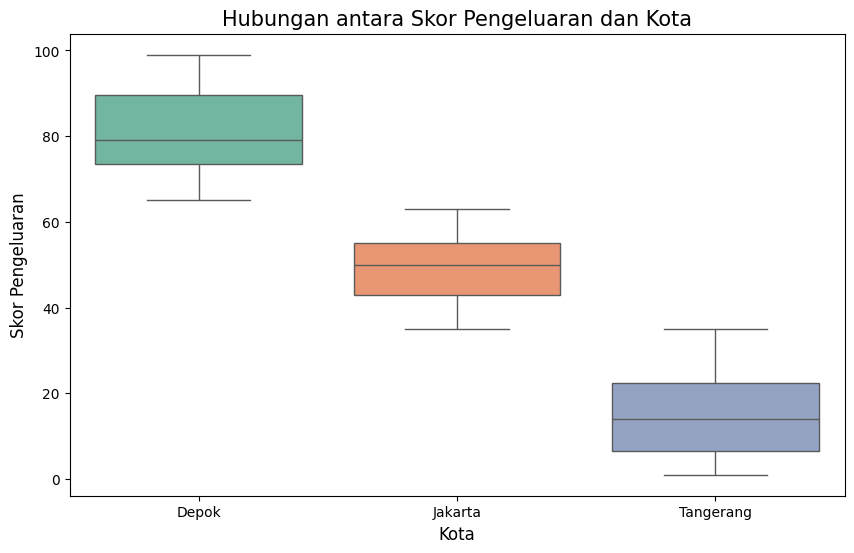

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot untuk menunjukkan hubungan antara kota dan skor pengeluaran
sns.boxplot(data=df, x='Kota', y='skor-pengeluaran', hue='Kota', palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Hubungan antara Skor Pengeluaran dan Kota', fontsize=15)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Skor Pengeluaran', fontsize=12)

# Menampilkan plot
plt.show()

Index(['Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
       'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor', 'skor_interval'],
      dtype='object')


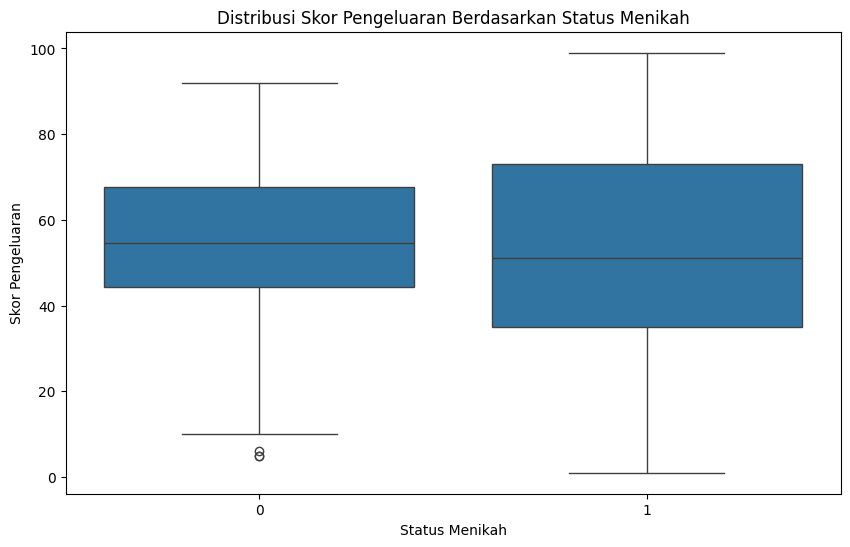

In [ ]:
# Tampilkan nama-nama kolom
print(df.columns)

# Buat boxplot untuk melihat distribusi skor pengeluaran berdasarkan status menikah
plt.figure(figsize=(10, 6))
sns.boxplot(x='Menikah', y='skor-pengeluaran', data=df)

# Menambahkan judul dan label
plt.title('Distribusi Skor Pengeluaran Berdasarkan Status Menikah')
plt.xlabel('Status Menikah')
plt.ylabel('Skor Pengeluaran')

# Tampilkan plot
plt.show()

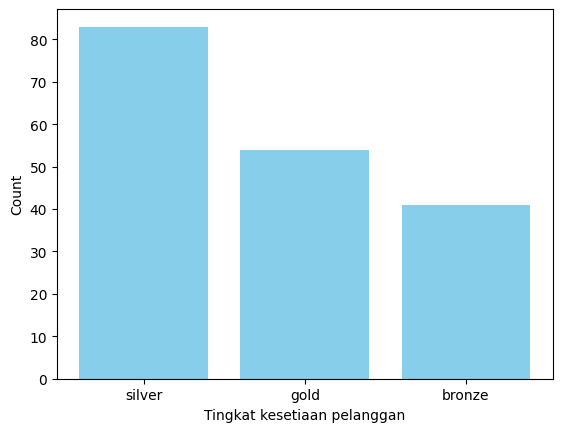

In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi dari variabel kategorik
counts = df['skor_interval'].value_counts()

# Membuat bar plot
plt.bar(counts.index, counts.values, color='skyblue')
plt.title('')
plt.xlabel('Tingkat kesetiaan pelanggan')
plt.ylabel('Count')
plt.xticks(counts.index)  # Label sumbu X sesuai dengan kategori
plt.show()


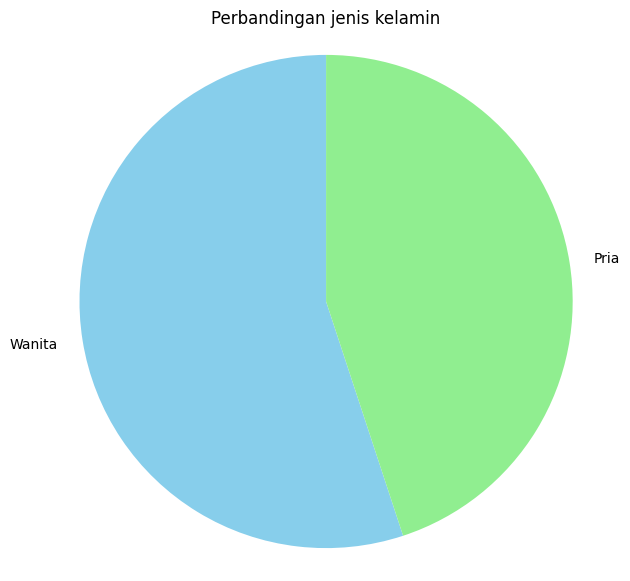

In [ ]:
hari_count = df['Jenis Kelamin'].value_counts()

# Membuat pie chart
plt.figure(figsize=(7, 7))
plt.pie(hari_count, labels=hari_count.index, autopct=' ', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 'lightpink'])

# Menambahkan judul
plt.title('Perbandingan jenis kelamin')
plt.axis('equal')  # Memastikan pie chart dalam bentuk lingkaran
plt.show()

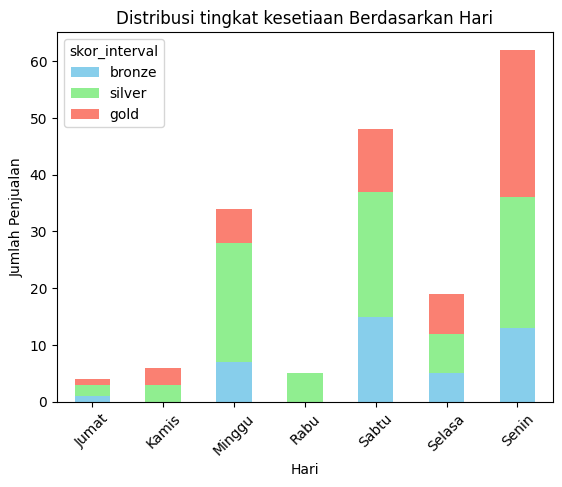

In [ ]:
# Menghitung frekuensi rasa es krim per hari
count_data = df.groupby(['HariFav', 'skor_interval']).size().unstack(fill_value=0)

# Membuat bar plot
count_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'])

# Menambahkan judul dan label
plt.title('Distribusi tingkat kesetiaan Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.show()

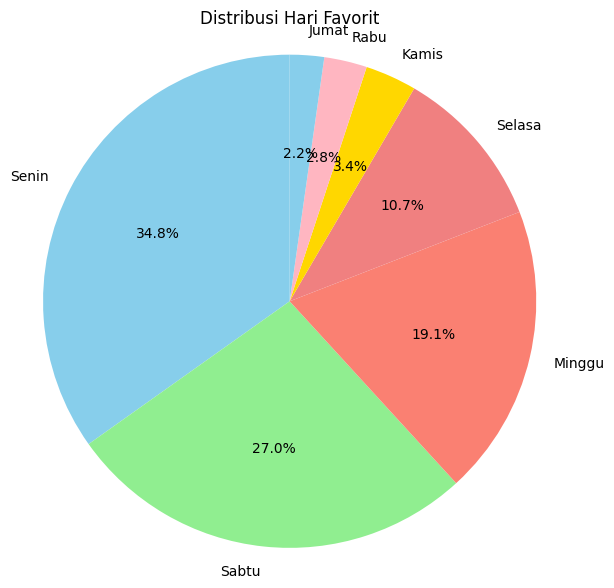

In [ ]:
hari_count = df['HariFav'].value_counts()

# Membuat pie chart
plt.figure(figsize=(7, 7))
plt.pie(hari_count, labels=hari_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 'lightpink'])

# Menambahkan judul
plt.title('Distribusi Hari Favorit')
plt.axis('equal')  # Memastikan pie chart dalam bentuk lingkaran
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         178 non-null    category
 1   Umur                  178 non-null    int64   
 2   Pendapatan-per-bulan  178 non-null    int64   
 3   skor-pengeluaran      178 non-null    int64   
 4   Menikah               178 non-null    category
 5   Kota                  178 non-null    category
 6   Promo                 178 non-null    category
 7   HariFav               178 non-null    category
 8   FavFlavor             178 non-null    category
 9   skor_interval         178 non-null    category
dtypes: category(7), int64(3)
memory usage: 11.7 KB


# Insight

1. Hari Senin memiliki jumlah pelanggan es krim terbanyak, sedangkan hari Jumat adalah hari dengan jumlah pelanggan terendah.
2. Rasa vanilla adalah rasa yang paling populer diantara rasa-rasa yang lain, sedangkan untuk rasa coklat kurang diminati oleh pelanggan
3. Cabang di kota Tangerang terlihat lebih rendah dalam jumlah pelanggan es krim dibandingkan dua kota lainnya.
4. Sebagian besar pelanggan termasuk dalam kategori "1" (jarang menggunakan promo), diikuti oleh kategori "3" (sering menggunakan promo).
Hanya sedikit pelanggan yang tidak pernah menggunakan promo ("0").
Hal ini menunjukkan bahwa banyak pelanggan yang sudah terlibat dalam penggunaan promo, namun intensitas penggunaannya bervariasi, dengan mayoritas masih dalam taraf jarang.
5. Mayoritas pelanggan yang membeli es krim adalah mereka yang berstatus menikah.
6. Sebagian besar pelanggan es krim adalah wanita, terlihat dari jumlah yang lebih tinggi dibandingkan pria.

#Rekomendasi

1. Untuk meningkatkan kunjungan di hari-hari dengan traffic rendah seperti Jumat, perusahaan dapat memberikan promo eksklusif di hari Jumat dengan membuat kampanye "FriYAY Deals" untuk menarik perhatian pelanggan.
2. Perusahaan perlu menerapkan cross-selling dengan cara menawarkan paket combo es krim yang menggabungkan rasa-rasa populer seperti vanila dan rasa-rasa yang kurang populer seperti coklat dengan harga spesial.
3. Tangerang membutuhkan perhatian lebih dalam hal promosi, mengingat jumlah pelanggan yang lebih sedikit dibandingkan Jakarta dan Depok. Perusahaan perlu menerapkan strategi promosi yang lebih kuat dan inovatif di Tangerang untuk meningkatkan traffic dan penjualan, misalnya promosi media sosial, kerja sama dengan influencer, dan penawaran khusus.
4. Mengimplementasikan program loyalitas di mana pelanggan mendapatkan poin untuk setiap pembelian, yang bisa ditukarkan dengan diskon atau hadiah eksklusif. Ini akan mendorong pelanggan untuk lebih sering bertransaksi, sekaligus meningkatkan loyalitas pelanggan.


# Scaling Data


In [ ]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[numerical_columns].describe().round(1))

# Standarisasi
df_num = StandardScaler().fit_transform(df[numerical_columns])

# Membuat DataFrame
df_num = pd.DataFrame(data=df_num, index=df.index, columns=df[numerical_columns].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_num.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_num.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  178.0                 178.0             178.0
mean    37.0            18472554.3              51.0
std     11.9            10609061.4              25.8
min     18.0                   0.0               1.0
25%     28.0            10450819.0              35.2
50%     35.0            18647540.5              51.5
75%     47.0            25409836.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  1.011308             -0.506446          0.037166
1 -0.421378              1.430541          1.360267
2  1.179859             -0.235268         -0.390896
3 -1.516962             -0.545185          0.153910
4  0.084276              0.152130         -0.351982

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  178.0                 178.0             178.0
mean    -0.0         

In [ ]:
# Membuat salinan dataframe
df_cat = df[categorical_columns].copy()

# Membuat dictionary untuk menyimpan encoder setiap kolom
encoders = {}

# Melakukan LabelEncoder untuk setiap kolom kategorikal
for col in categorical_columns:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

    # Simpan LabelEncoder yang digunakan agar bisa dilihat kembali label aslinya
    encoders[col] = le

# Menampilkan hasil encoding
print(df_cat.head())

# Mengetahui label dan nilai aslinya untuk suatu kolom
for col in categorical_columns:
    print(f"Kolom: {col}")
    print("Nilai Asli:", encoders[col].classes_)
    print("Label:", list(range(len(encoders[col].classes_))))
    print()


   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8
Kolom: Jenis Kelamin
Nilai Asli: ['Pria' 'Wanita']
Label: [0, 1]

Kolom: Menikah
Nilai Asli: [0 1]
Label: [0, 1]

Kolom: Kota
Nilai Asli: ['Depok' 'Jakarta' 'Tangerang']
Label: [0, 1, 2]

Kolom: Promo
Nilai Asli: [0. 1. 2. 3.]
Label: [0, 1, 2, 3]

Kolom: HariFav
Nilai Asli: ['Jumat' 'Kamis' 'Minggu' 'Rabu' 'Sabtu' 'Selasa' 'Senin']
Label: [0, 1, 2, 3, 4, 5, 6]

Kolom: FavFlavor
Nilai Asli: [0 1 2 3 4 5 6 7 8]
Label: [0, 1, 2, 3, 4, 5, 6, 7, 8]



In [ ]:
#Menggabungkan df_num dan df_cat
df_model = df_cat.merge(df_num, left_index = True, right_index=True, how = 'left')
df_model.head()

,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,1,1,1,1,4,2,1.011308,-0.506446,0.037166
1,1,1,0,1,2,6,-0.421378,1.430541,1.360267
2,0,1,1,2,2,3,1.179859,-0.235268,-0.390896
3,0,0,1,1,3,7,-1.516962,-0.545185,0.153910
4,1,1,1,2,6,8,0.084276,0.152130,-0.351982


#Clustering

##K-MEANS

In [ ]:
X = df_model[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']]
C = df_model['FavFlavor']
print(X.shape)
df_model.sample(7)

(178, 3)


,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor,Umur,Pendapatan-per-bulan,skor-pengeluaran
91,0,1,2,3,2,7,1.854064,0.423308,-1.558339
37,1,1,0,1,6,0,-0.842757,0.694486,1.477011
103,1,1,1,2,4,4,0.421378,0.190869,-0.313067
189,0,1,1,1,2,8,1.685513,-0.545185,0.192825
67,1,1,1,1,4,7,1.938340,-0.390227,-0.079578
7,1,1,0,1,6,3,-1.095584,-1.552418,1.010034
183,1,0,0,1,6,7,-1.179859,-1.203761,1.399182


Text(0.5, 1.0, 'Elbow curve')

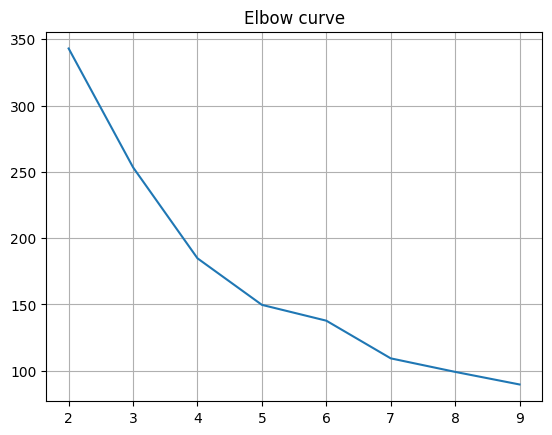

In [ ]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn import cluster, datasets
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')


Dari output di atas, grafik menunjukkan adanya patahan yang membentuk elbow pada k = 4. Berdasarkan metode ini, nilai k optimal ditemukan saat k = 4.

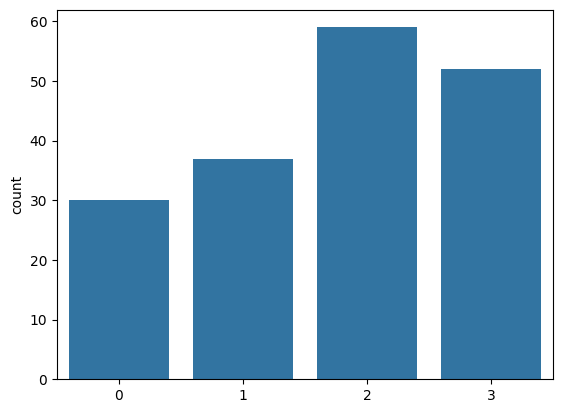

In [ ]:
km = cluster.KMeans(n_clusters=4, init='random', random_state = 0)
km.fit(X)

C_km = km.predict(X)
p= sns.countplot(x=C_km)

In [ ]:
C_km

array([2, 1, 2, 3, 2, 1, 3, 3, 3, 3, 3, 1, 0, 2, 0, 1, 2, 3, 3, 2, 0, 1,
       3, 2, 2, 3, 1, 3, 1, 1, 3, 0, 3, 1, 2, 3, 2, 3, 0, 1, 2, 3, 2, 3,
       2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 1, 2, 2,
       2, 0, 3, 0, 2, 1, 1, 3, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 1, 3, 2, 0, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 0, 2, 1, 2, 2, 0,
       0, 0, 3, 2, 0, 2, 3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2,
       0, 0, 3, 1, 3, 2, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 3, 1, 3, 0, 2,
       3, 1, 0, 0, 3, 3, 1, 1, 0, 3, 0, 2, 3, 2, 2, 3, 1, 2, 3, 3, 2, 1,
       3, 2], dtype=int32)

In [ ]:
df_model['k-means'] = C_km

In [ ]:
df_model

,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor,Umur,Pendapatan-per-bulan,skor-pengeluaran,k-means
0,1,1,1,1,4,2,1.011308,-0.506446,0.037166,2
1,1,1,0,1,2,6,-0.421378,1.430541,1.360267,1
2,0,1,1,2,2,3,1.179859,-0.235268,-0.390896,2
3,0,0,1,1,3,7,-1.516962,-0.545185,0.153910,3
4,1,1,1,2,6,8,0.084276,0.152130,-0.351982,2
...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,1,6,0,-0.505654,-1.358720,0.854375,3
196,0,1,1,1,2,5,1.685513,-0.235268,-0.001749,2
197,1,1,0,1,6,7,-0.168551,2.321554,1.087864,1
198,1,1,0,0,5,0,-1.179859,-1.629898,1.671585,3


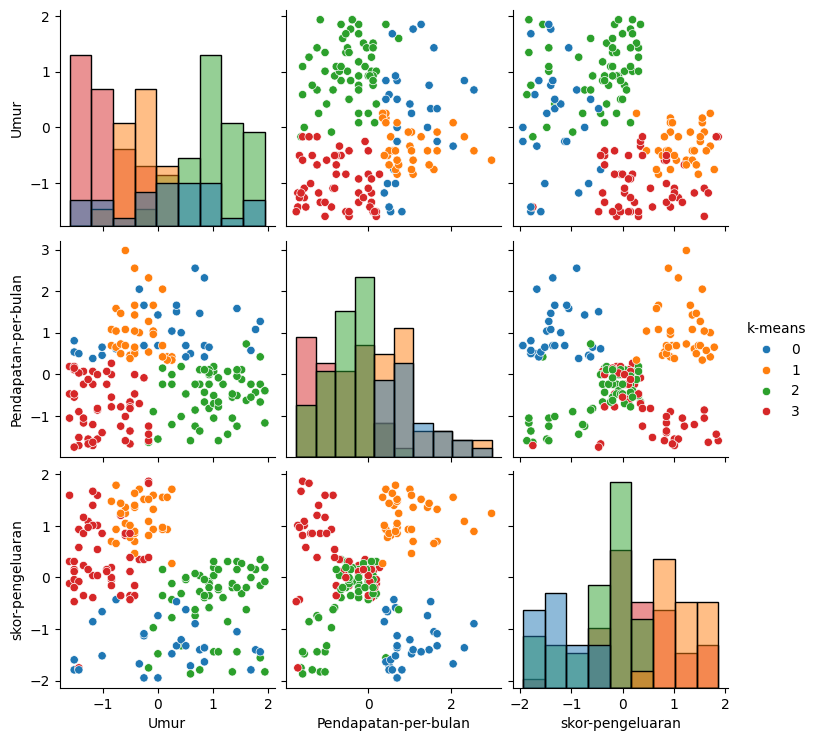

In [ ]:
sns.pairplot(df_model[['Umur',	'Pendapatan-per-bulan',	'skor-pengeluaran',	'k-means']], hue="k-means", diag_kind="hist", palette="tab10")

##KMEANS++

array([1, 2, 1, 0, 0, 2, 0, 3, 0, 0], dtype=int32)

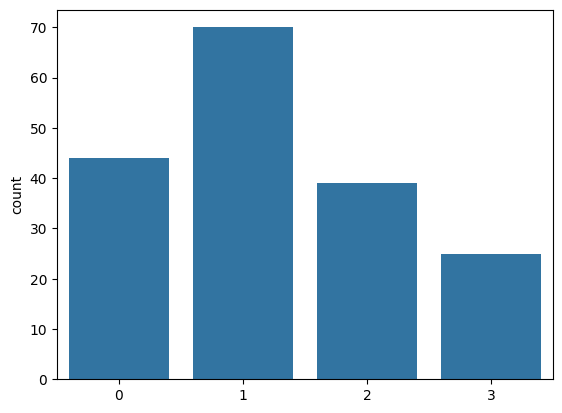

In [ ]:
kmPP = cluster.KMeans(n_clusters=4, init='k-means++')
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

In [ ]:
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,skor_interval
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2,silver
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6,gold
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3,silver
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7,silver
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8,silver
...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0,gold
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5,silver
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7,gold
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0,gold


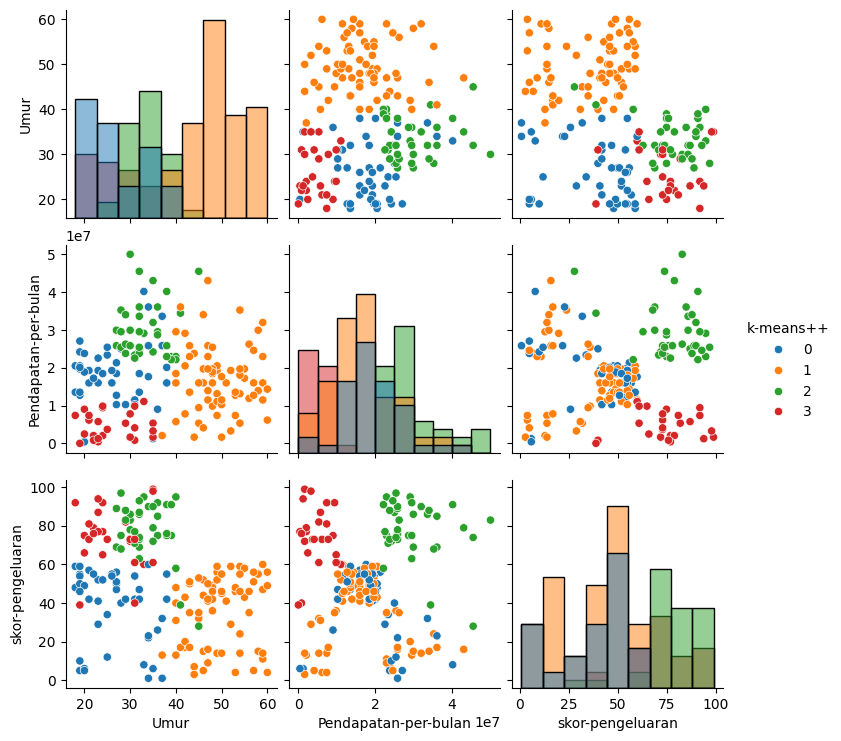

In [ ]:
df['k-means++'] = C_kmpp
g = sns.pairplot(df[['Umur',	'Pendapatan-per-bulan',	'skor-pengeluaran',	'k-means++']], hue="k-means++", diag_kind="hist", palette="tab10")

##MINI BATCH K-MEANS

array([3, 1, 3, 2, 0, 1, 2, 2, 2, 2], dtype=int32)

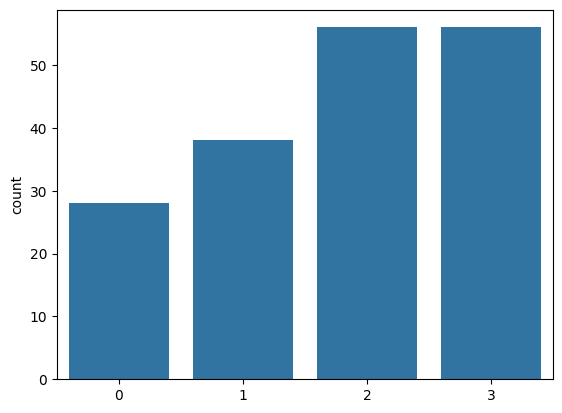

In [ ]:
mbkm = cluster.MiniBatchKMeans(n_clusters=4, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = 0)
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(x=C_mbkm)
C_mbkm[:10]

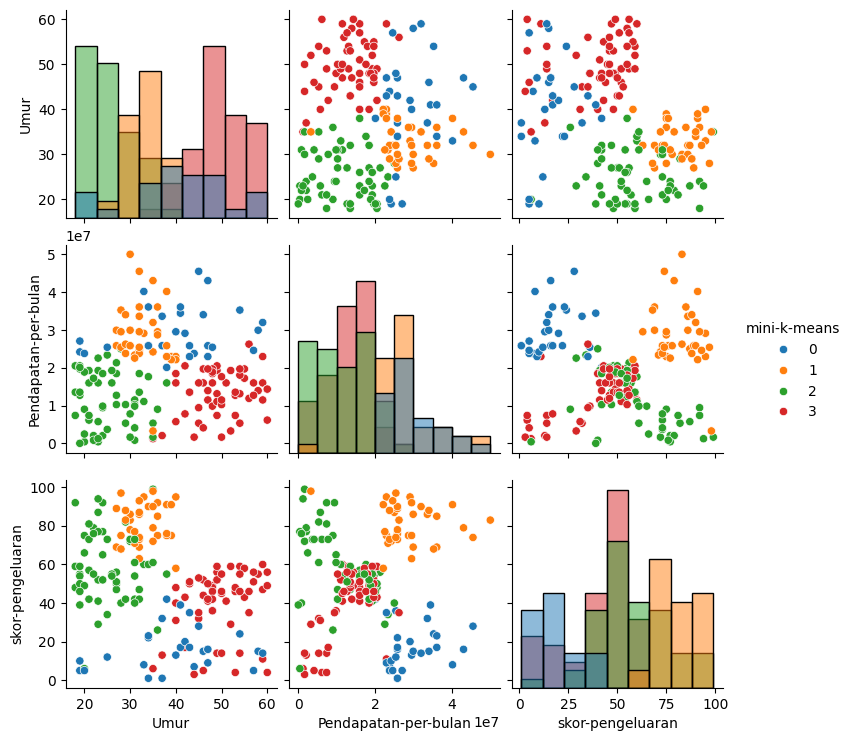

In [ ]:
df['mini-k-means'] = C_mbkm
g = sns.pairplot(df[['Umur',	'Pendapatan-per-bulan',	'skor-pengeluaran','mini-k-means']], hue="mini-k-means", diag_kind="hist", palette="tab10")

##MINI BATCH K-MEANS++

array([2, 0, 2, 1, 2, 0, 1, 1, 1, 1], dtype=int32)

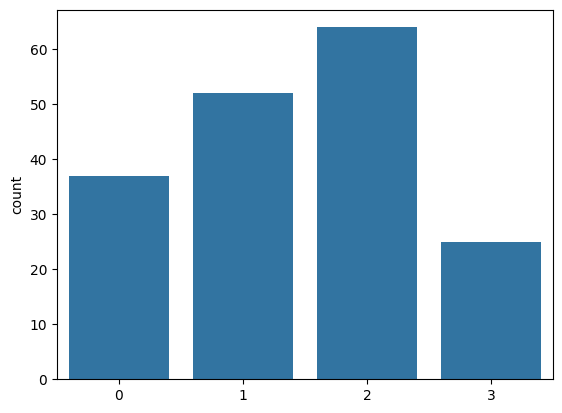

In [ ]:
mbkmPP = cluster.MiniBatchKMeans(n_clusters=4, init='k-means++', \
                                 max_iter=300, tol=0.0001, random_state = 0)
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(x=C_mbkmPP)
C_mbkmPP[:10]

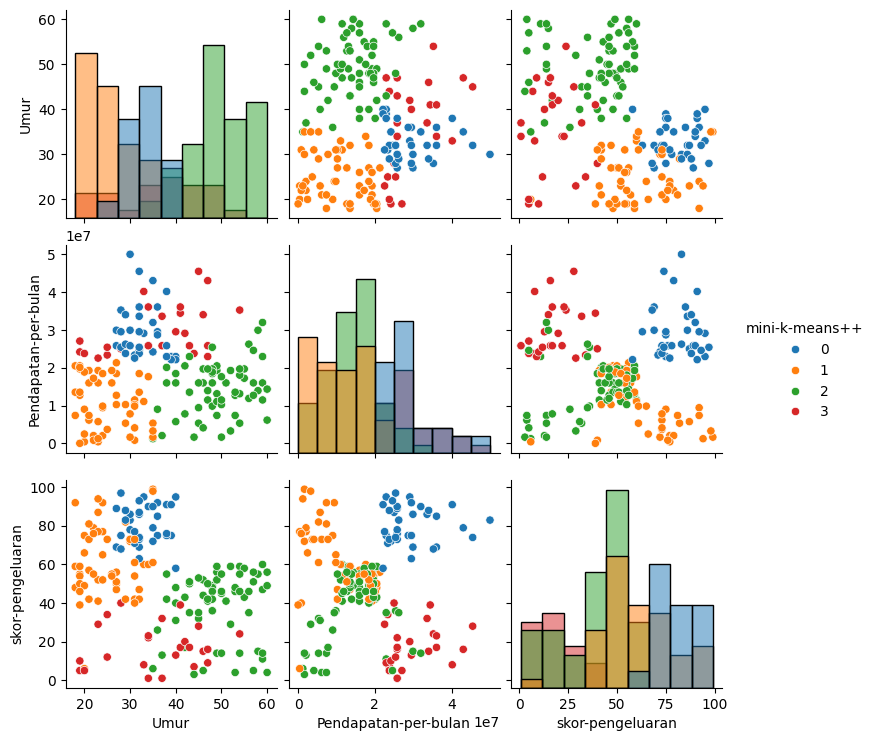

In [ ]:
df['mini-k-means++'] = C_mbkmPP
g = sns.pairplot(df[['Umur',	'Pendapatan-per-bulan',	'skor-pengeluaran','mini-k-means++']], \
                 hue="mini-k-means++", diag_kind="hist", palette="tab10")

##K-MEDOID (Metode yang terpilih)

In [ ]:
kmedoids = KMedoids(n_clusters=4).fit(X)
C_med = kmedoids.predict(X)
centroid_med = kmedoids.cluster_centers_

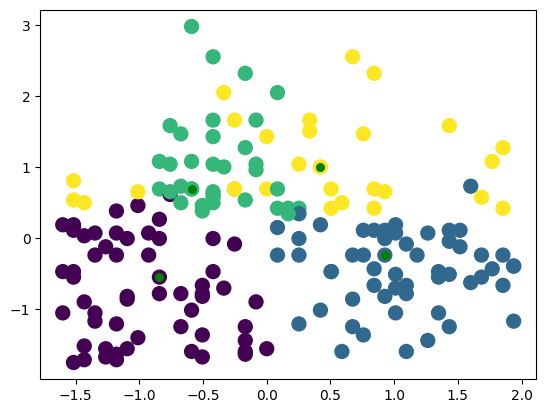

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

if isinstance(X, pd.DataFrame):
    X_np = X.to_numpy()
else:
    X_np = X

ax.scatter(X_np[:, 0], X_np[:, 1], c=C_med, s=100)
ax.scatter(centroid_med[:, 0], centroid_med[:, 1], c="green", s=30)
plt.show()

array([1, 2, 1, 0, 1, 2, 0, 0, 0, 0])

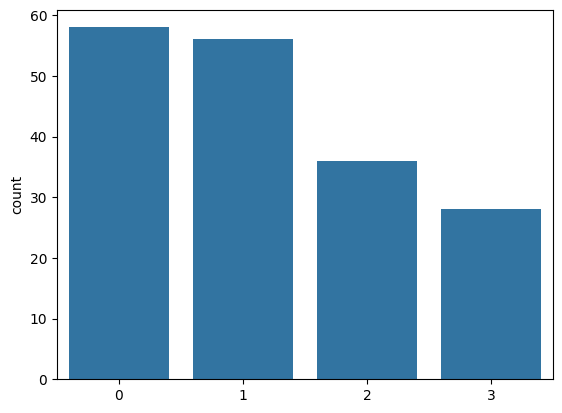

In [ ]:
kmedoids = KMedoids(n_clusters=4).fit(X)
C_medoid = kmedoids.predict(X)
sns.countplot(x=C_medoid)
C_medoid[:10]

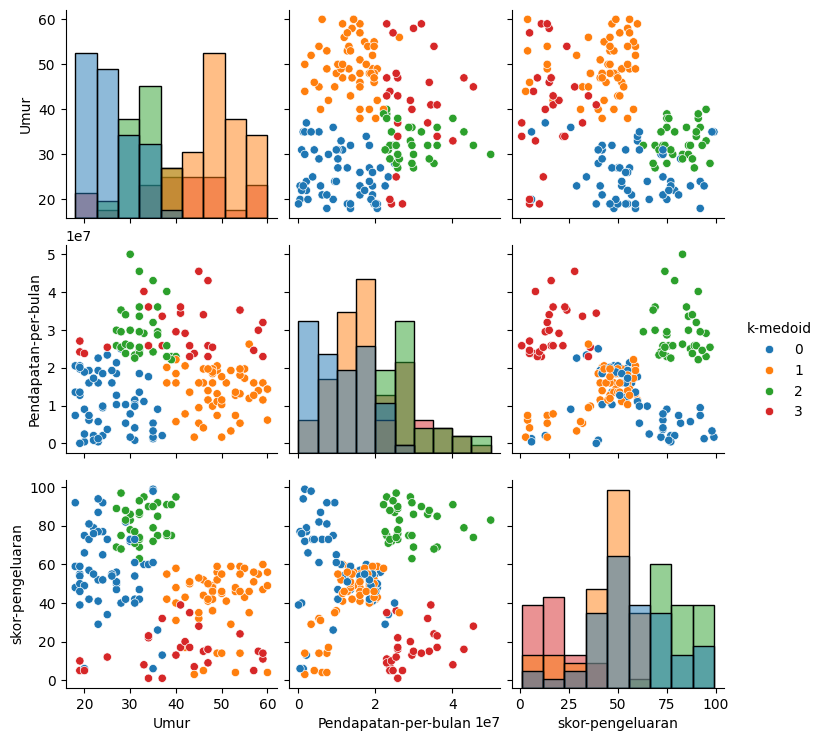

In [ ]:
df['k-medoid'] = C_medoid
g = sns.pairplot(df[['Umur',	'Pendapatan-per-bulan',	'skor-pengeluaran','k-medoid']], \
                 hue="k-medoid", diag_kind="hist", palette="tab10")

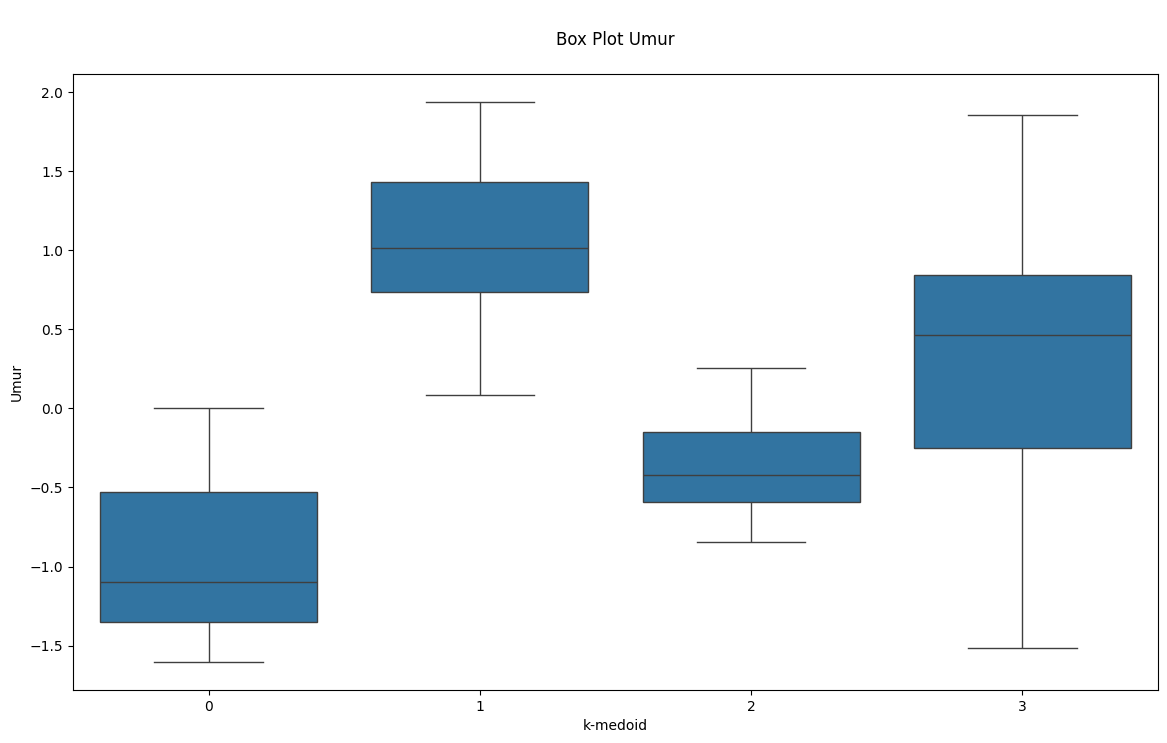

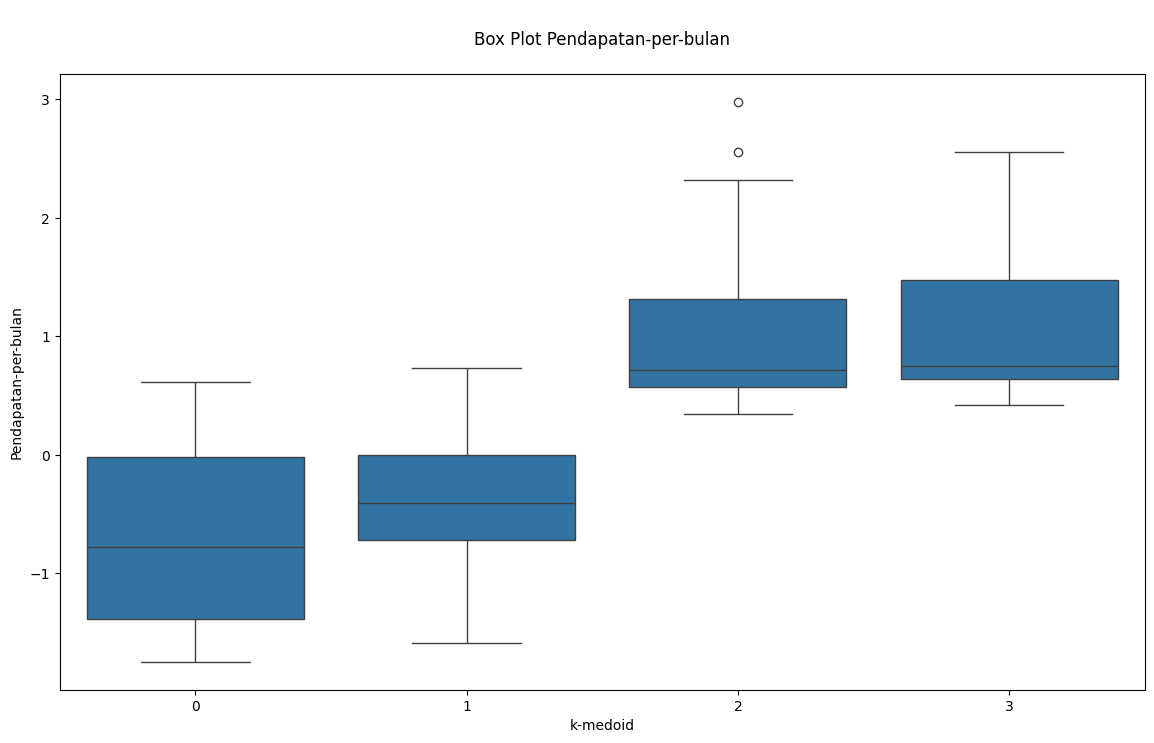

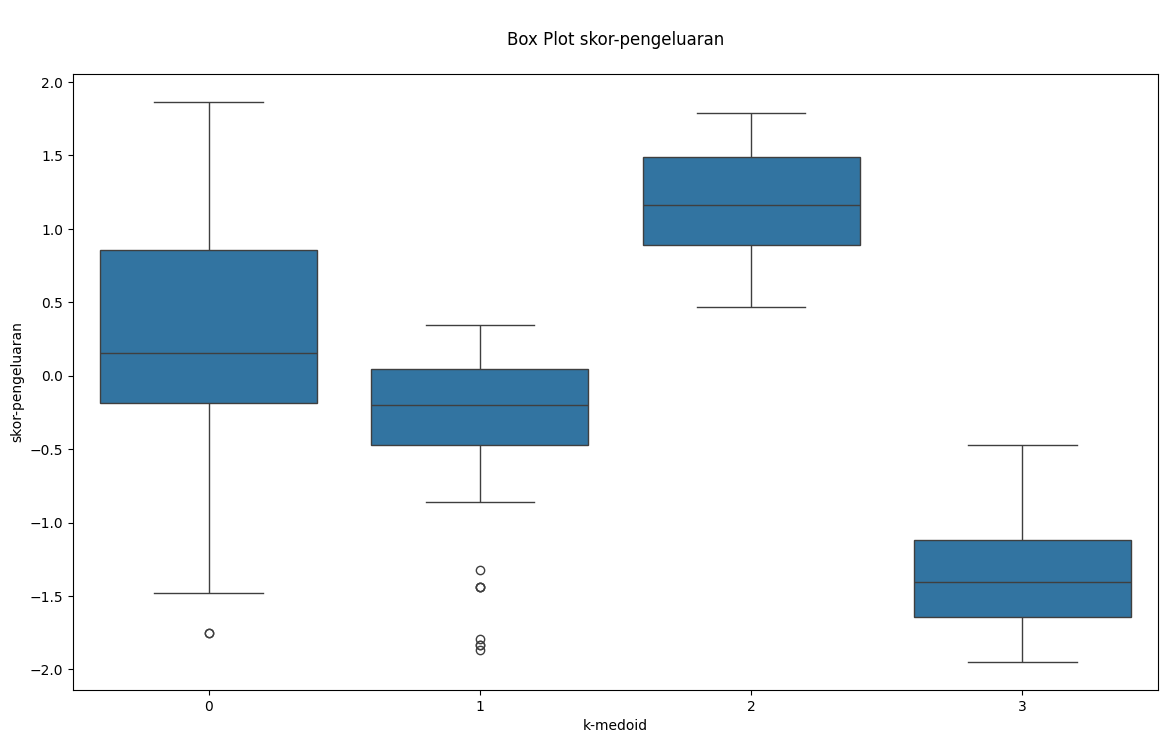

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = df['k-medoid'],y = i, data = df_model)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

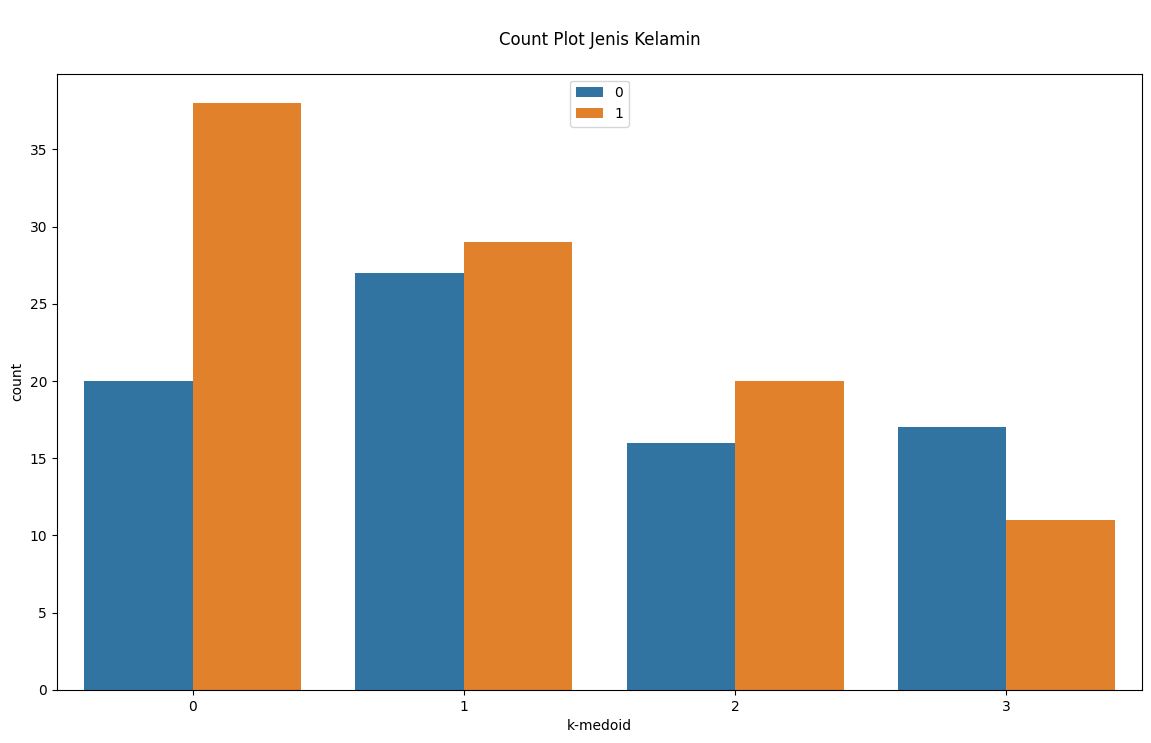

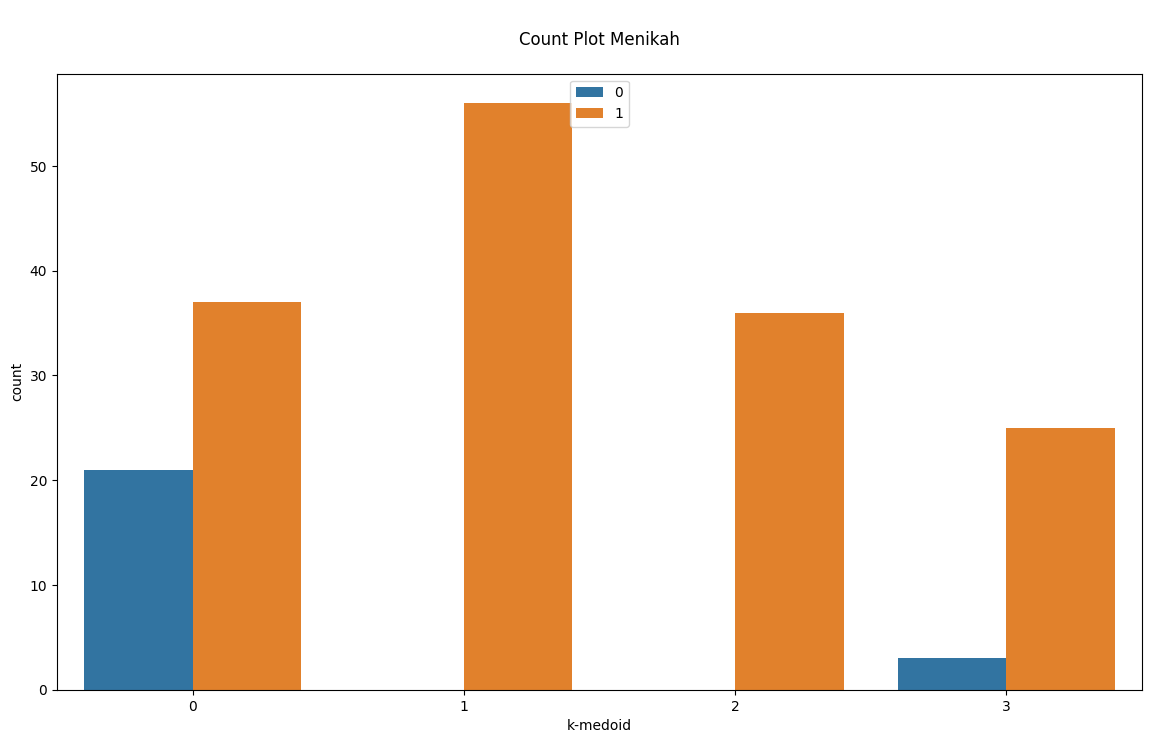

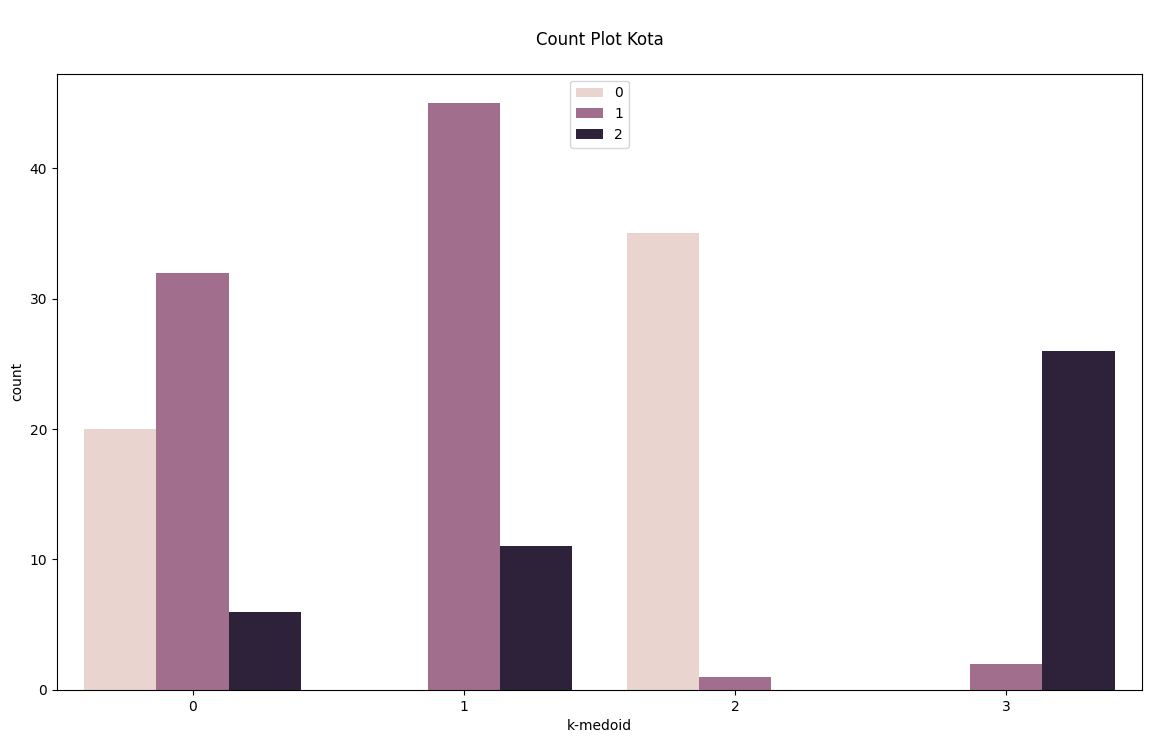

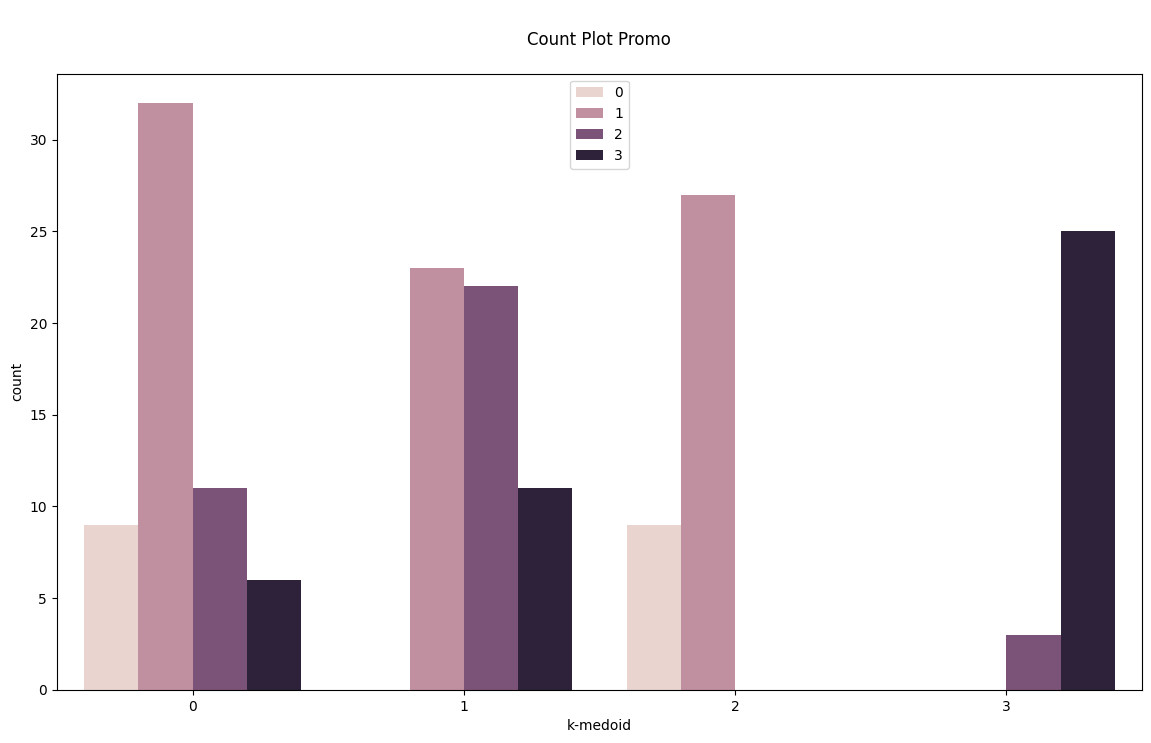

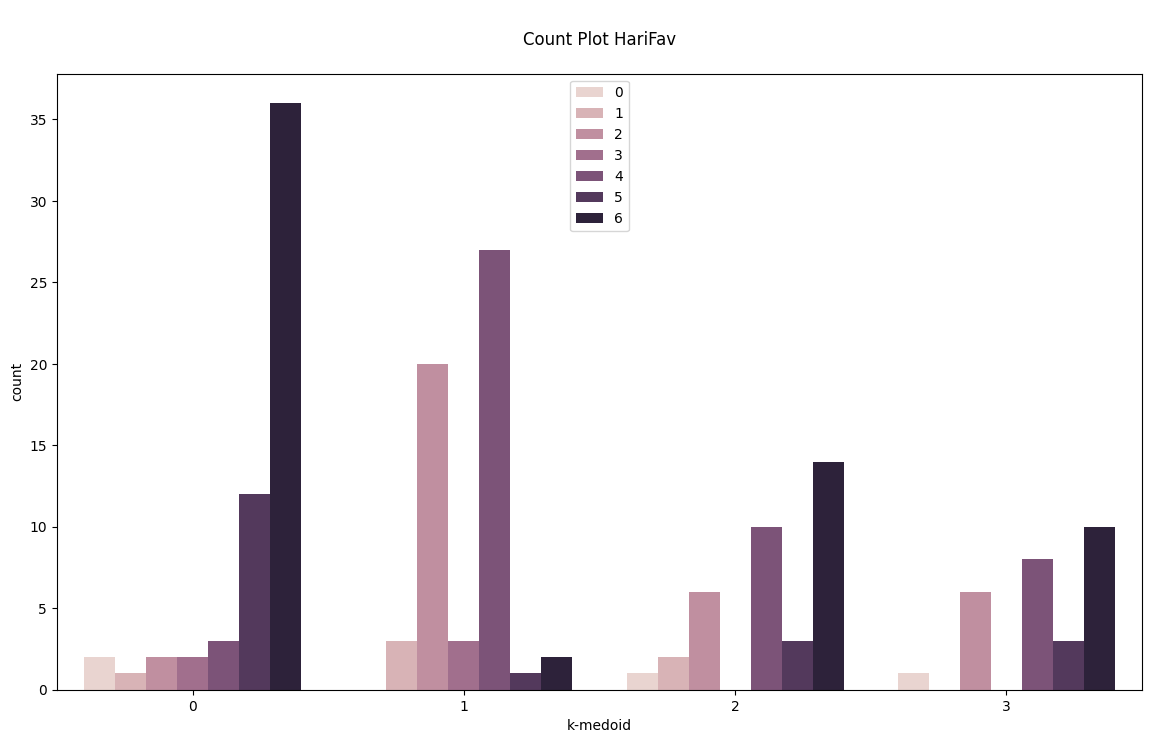

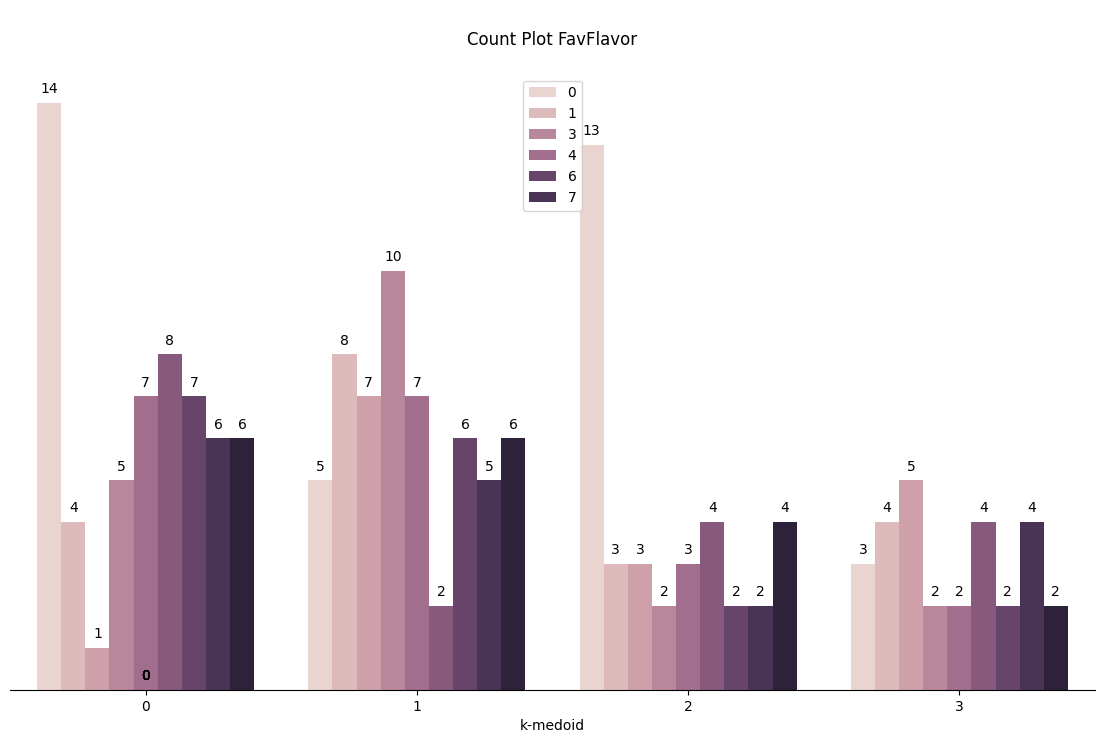

In [ ]:
for i in categorical_columns:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = df_model, x = df['k-medoid'], hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df[df['k-medoid'] == i])


Pelanggan Cluster: 0

    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
3            Pria    19              12704918                55       0   
6            Pria    27              21311475                56       1   
7          Wanita    24               2049180                77       1   
8          Wanita    32              13524590                47       1   
9          Wanita    21              19262295                42       1   
10         Wanita    31              11475409                54       1   
20           Pria    22               2049180                79       0   
21           Pria    18              13524590                59       0   
25         Wanita    21              15983606                57       0   
26         Wanita    35               1229508                 6       1   
28         Wanita    20               9016393                75       0   
30           Pria    24               9426229                92       1   
34

Berikut kesimpulan dari masing-masing cluster

1. **Cluster 0**:
   - **Umur**: Mayoritas anggotanya berada pada kelompok usia 30-50 tahun.
   - **Pendapatan per bulan**: Pendapatan cukup rendah, sebagian besar di bawah 2 juta.
   - **Skor Pengeluaran**: Skor pengeluaran bervariasi, dengan konsentrasi pada skor 20-50.
   - **Kesimpulan**: Cluster ini cenderung terdiri dari individu usia menengah dengan pendapatan rendah dan pengeluaran sedang. Karena cluster mempunyai pendapatan yang rendah, maka sebaiknya memperbanyak promo pada cluster ini, agar jumlah transaksi meningkat

2. **Cluster 1**:
   - **Umur**: Tersebar dalam rentang usia 30-50 tahun.
   - **Pendapatan per bulan**: Pendapatan relatif rendah, berkisar antara 1-2 juta per bulan.
   - **Skor Pengeluaran**: Skor pengeluaran bervariasi, dengan beberapa berada di skor 40-70.
   - **Kesimpulan**: Cluster ini menunjukkan kelompok usia menengah dengan pendapatan rendah-menengah dan pengeluaran bervariasi.

3. **Cluster 2**:
   - **Umur**: Anggota cenderung lebih muda, sebagian besar di bawah 30 tahun.
   - **Pendapatan per bulan**: Pendapatan tinggi, banyak yang di atas 4 juta per bulan.
   - **Skor Pengeluaran**: Pengeluaran juga tinggi, dengan banyak anggota di skor 60-100.
   - **Kesimpulan**: Kelompok ini adalah individu muda dengan pendapatan dan pengeluaran yang tinggi, menunjukkan kecenderungan konsumsi yang besar.

4. **Cluster 3**:
   - **Umur**: Umurnya tersebar antara 20 hingga 50 tahun, dengan banyak anggota di sekitar 30 tahun.
   - **Pendapatan per bulan**: Pendapatan berkisar antara 2-3 juta per bulan.
   - **Skor Pengeluaran**: Skor pengeluaran bervariasi, dengan beberapa anggota memiliki skor pengeluaran yang sangat rendah (di bawah 40).
   - **Kesimpulan**: Cluster ini terdiri dari individu dengan pendapatan menengah, dengan pengeluaran yang lebih rendah dibandingkan kelompok lainnya.

Secara keseluruhan, hasil clustering dengan *k-medoids* ini menunjukkan bahwa ada perbedaan signifikan dalam perilaku pengeluaran dan pendapatan per kelompok umur, dengan beberapa cluster yang mewakili individu dengan pendapatan tinggi dan pengeluaran tinggi (Cluster 2), serta individu dengan pendapatan dan pengeluaran yang lebih moderat (Cluster 0 dan 1).

##Evaluasi K-MEANS

In [ ]:
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP, C_medoid]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')

0.40863585510403844, 0.3749839978080968, 0.3977236433300019, 0.40840049797091765, 0.4046086775579964, 

Nilai terbaik di antara semua metode di atas adalah 0.011591363519957484. Meskipun masih mendekati 0, ini adalah nilai positif tertinggi dan menunjukkan clustering yang sedikit lebih baik dibandingkan nilai lainnya.

## Hierarchical

array([2, 0, 2, 0, 2, 0, 0, 0, 0, 0])

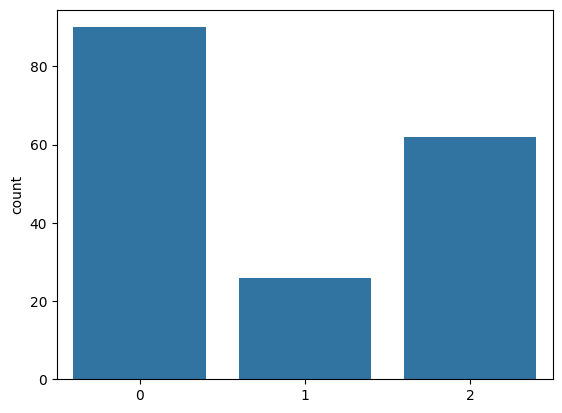

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
hierarchical.fit(X)
C_h = hierarchical.labels_.astype(int)

sns.countplot(x=C_h)
C_h[:10]


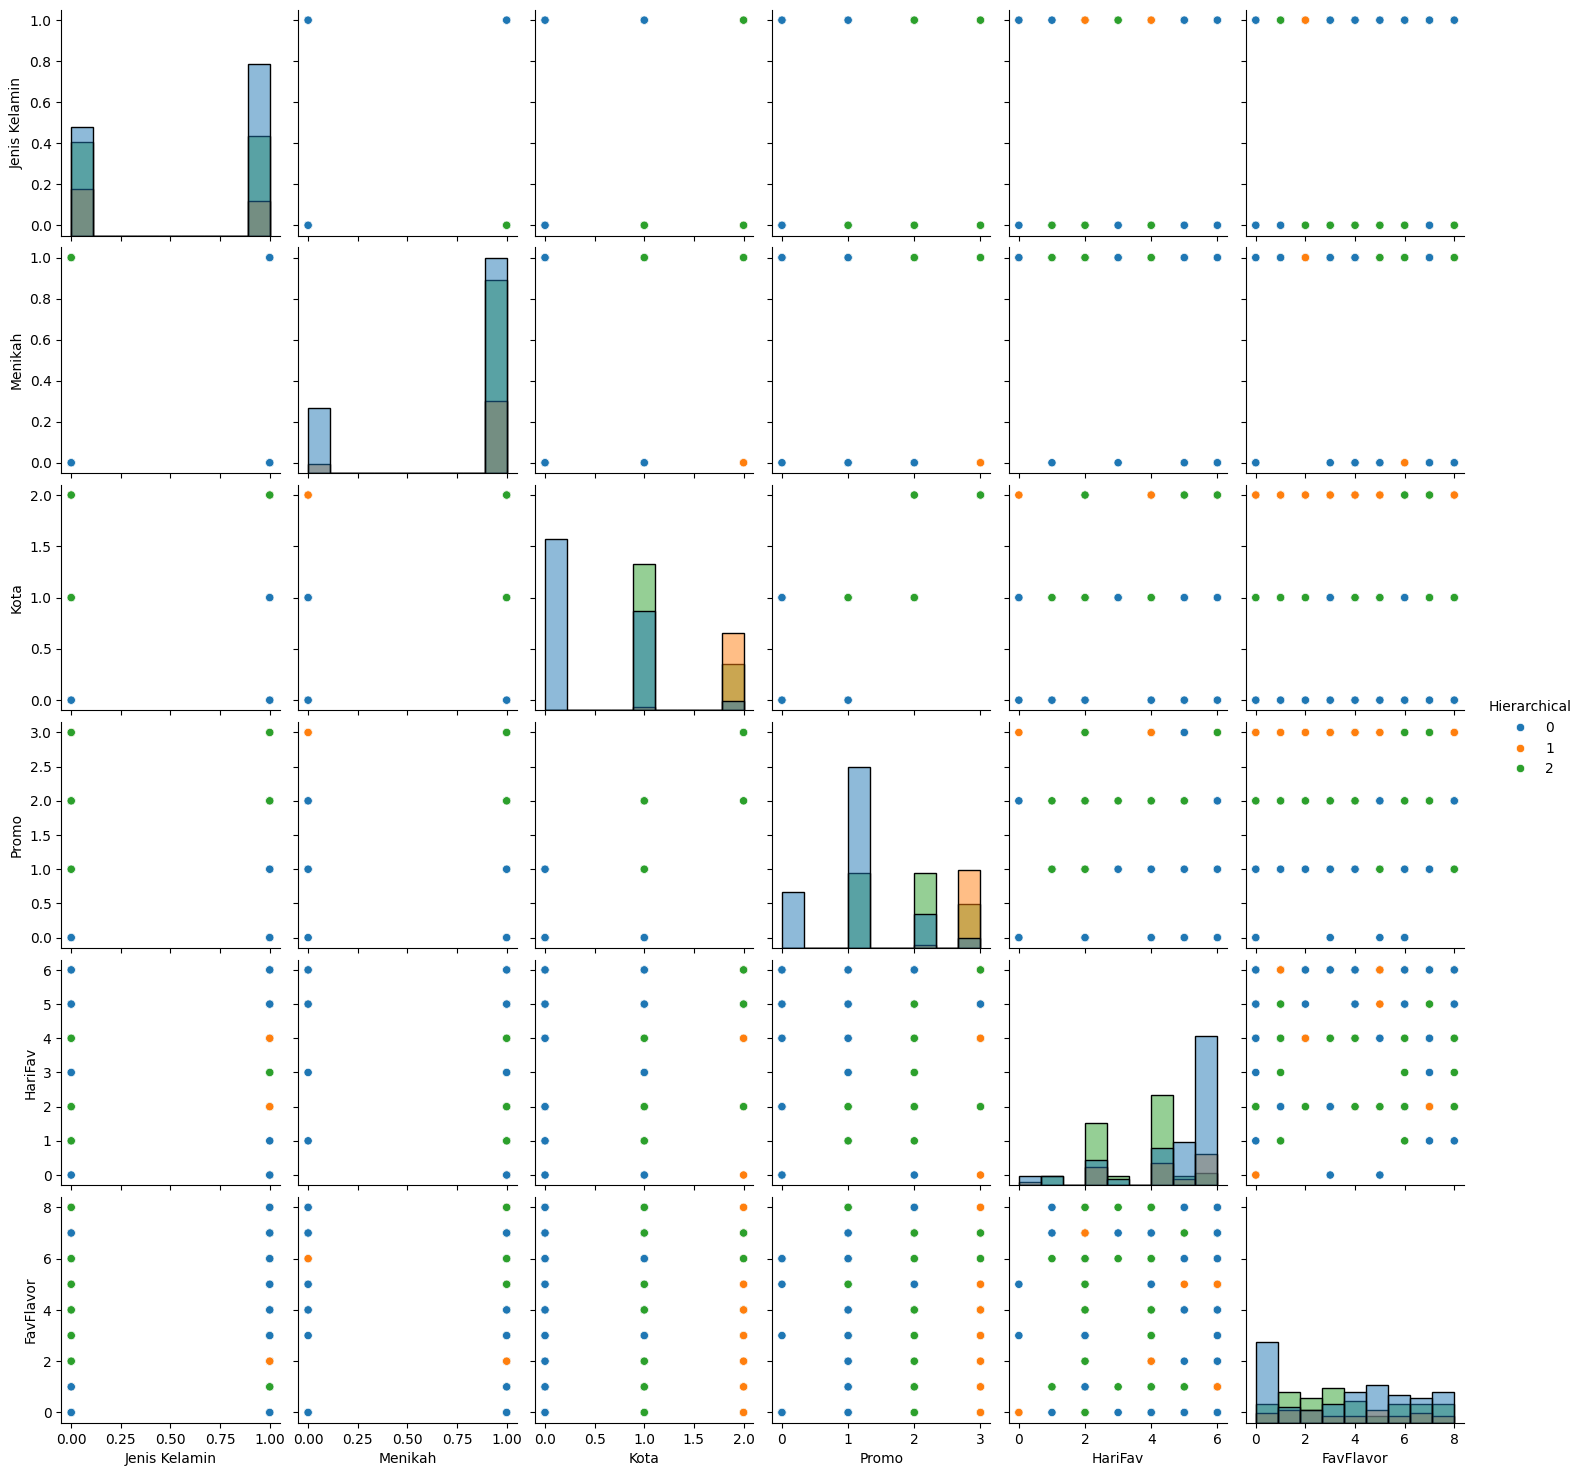

In [ ]:
df_model['Hierarchical'] = C_h
g = sns.pairplot(df_model[['Jenis Kelamin','Menikah','Kota','Promo', 'HariFav', 'FavFlavor', 'Hierarchical']], \
                 hue="Hierarchical", diag_kind="hist", palette="tab10")

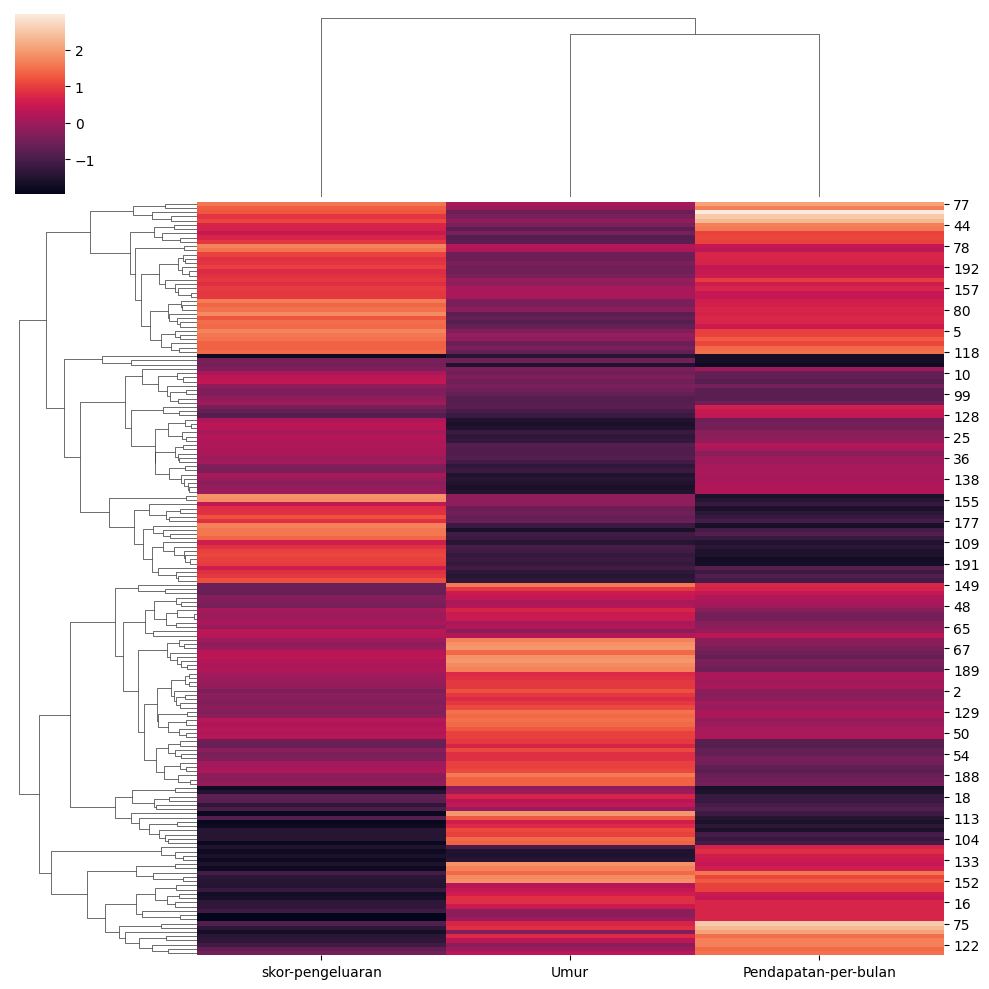

In [ ]:
g = sns.clustermap(X, method="average", metric="euclidean")

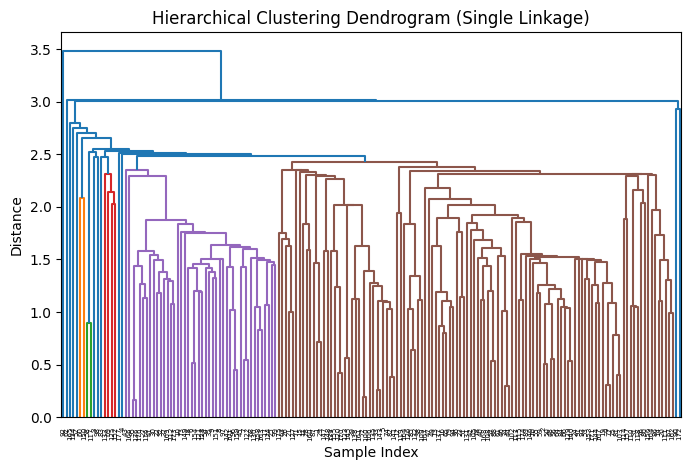

In [ ]:
# Hierarchical clustering dengan single linkage
Z = linkage(df_model, method='single')

plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Data dengan 4 cluster:
    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0          Wanita    49              13114754                52       1   
1          Wanita    32              33606557                86       1   
2            Pria    51              15983606                41       1   
3            Pria    19              12704918                55       0   
4          Wanita    38              20081967                42       1   
..            ...   ...                   ...               ...     ...   
195          Pria    31               4098360                73       1   
196          Pria    57              15983606                51       1   
197        Wanita    35              43032786                79       1   
198        Wanita    23               1229508                94       1   
199          Pria    50               1639344                14       1   

          Kota Promo HariFav FavFlavor skor_interval  k-means++  mini-k-mean

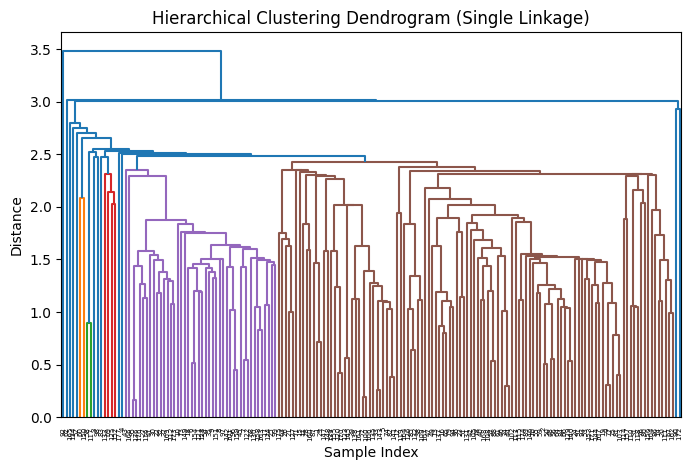

In [ ]:
# Hierarchical clustering dengan single linkage
Z = linkage(df_model, method='single')

clusters = fcluster(Z, 4, criterion='maxclust')

df['Hierarchical'] = clusters

print("Data dengan 4 cluster:")
print(df)

plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

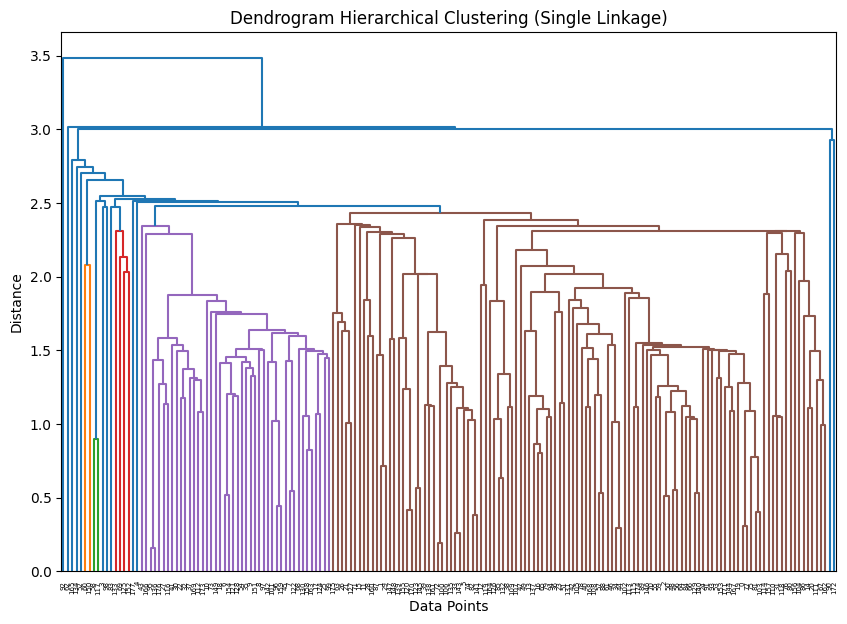

In [ ]:
X = df_model

Z = linkage(X, method='single', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## DBScan



(178, 3)


array([0, 1, 0, 2, 0, 1, 2, 2, 2, 2])

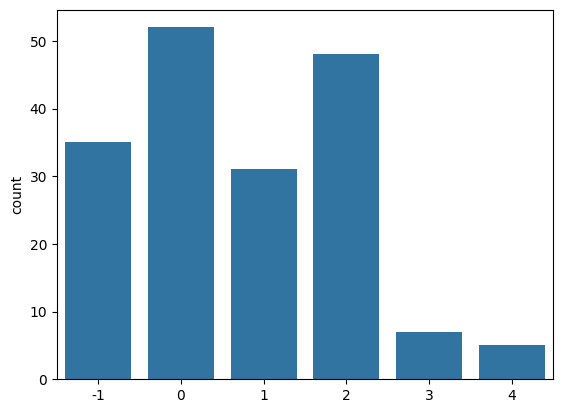

In [ ]:
X = df_model[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']]
C = df_model['FavFlavor']
print(X.shape)
df.sample(7)

dbscan = cluster.DBSCAN(eps=0.625, min_samples=5, metric='euclidean')
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
sns.countplot(x=C_db)
C_db[:10]

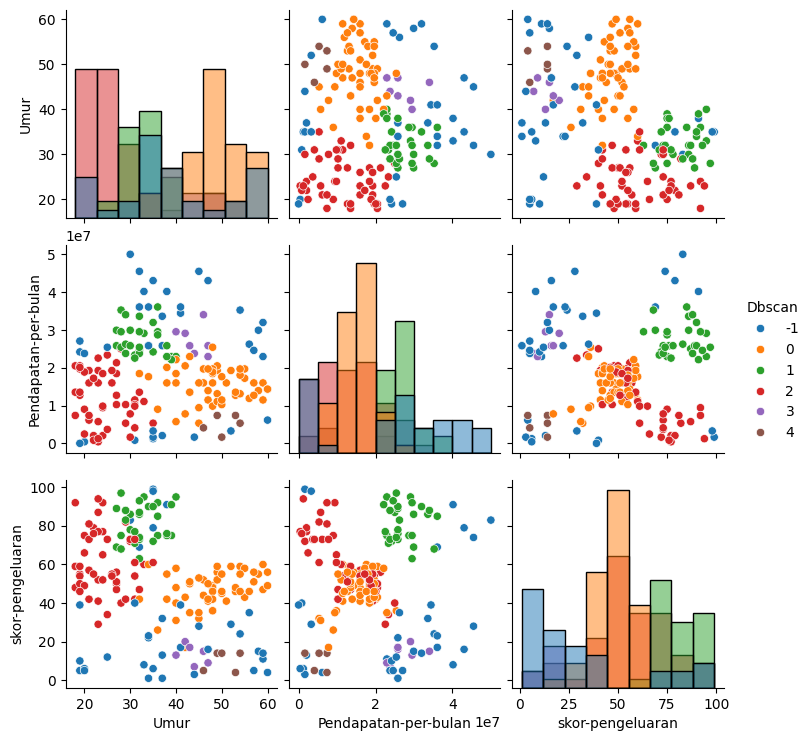

In [ ]:
df['Dbscan'] = C_db
g = sns.pairplot(df[['Umur','Pendapatan-per-bulan','skor-pengeluaran','Dbscan']], \
                 hue="Dbscan", diag_kind="hist", palette="tab10")